In [37]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path



In [38]:
MTEB_PATHS = Path("../non_sync/mteb_benchmarking/results/trained_models")

# list all json
json_files = list(MTEB_PATHS.rglob("*.json"))

# load all json
data = []
for json_file in json_files:
    with open(json_file, "r") as f:
        data.append(json.load(f))



In [39]:

data[0]['scores']['test'][0]
data[0]['task_name']
data[0]


{'dataset_revision': 'e8379541af4e31359cca9fbcf4b00f2671dba205',
 'evaluation_time': 8.930384159088135,
 'kg_co2_emissions': None,
 'mteb_version': '1.12.83',
 'scores': {'test': [{'accuracy': 0.7914925373134329,
    'ap': 0.430810217905071,
    'ap_weighted': 0.430810217905071,
    'f1': 0.7320145891480402,
    'f1_weighted': 0.808704900690058,
    'hf_subset': 'en',
    'languages': ['eng-Latn'],
    'main_score': 0.7914925373134329,
    'scores_per_experiment': [{'accuracy': 0.7686567164179104,
      'ap': 0.3620214624857723,
      'ap_weighted': 0.3620214624857723,
      'f1': 0.6903059961649831,
      'f1_weighted': 0.785163841456361},
     {'accuracy': 0.7910447761194029,
      'ap': 0.4462831010872368,
      'ap_weighted': 0.4462831010872368,
      'f1': 0.7386458623572025,
      'f1_weighted': 0.809908385073795},
     {'accuracy': 0.755223880597015,
      'ap': 0.4054731606510747,
      'ap_weighted': 0.4054731606510747,
      'f1': 0.7043184362352536,
      'f1_weighted': 0.77

In [47]:
records = []


for path, results in zip(json_files, data):
    model_ref = path.parts[-4]
    expe_name = path.parts[-5]
    expe = path.parts[-7]
    step = int(model_ref.split("=")[-1])
    
    if path.stem == "model_meta":
        continue
    
    
    main_score = results['scores']['test'][0]['main_score']
    task_name = results['task_name']
    records.append({
        "model": model_ref,
        "Training step": step,
        "Task": task_name,
        "Accuracy": main_score,
        "Expe": expe_name,
        "Expe_group": expe
    })

df = pd.DataFrame(records)

In [48]:
df

,model,Training step,Task,Accuracy,Expe,Expe_group
0,epoch=1-step=10000,10000,AmazonCounterfactualClassification,0.791493,snowflake-arctic-embed-m,snowflakes_s_nll
1,epoch=1-step=10000,10000,AmazonPolarityClassification,0.884588,snowflake-arctic-embed-m,snowflakes_s_nll
2,epoch=1-step=10000,10000,MassiveScenarioClassification,0.798588,snowflake-arctic-embed-m,snowflakes_s_nll
3,epoch=1-step=10000,10000,AmazonReviewsClassification,0.444600,snowflake-arctic-embed-m,snowflakes_s_nll
4,epoch=1-step=10000,10000,Banking77Classification,0.847727,snowflake-arctic-embed-m,snowflakes_s_nll
...,...,...,...,...,...,...
223,epoch=7-step=40000,40000,ImdbClassification,0.759048,snowflake-arctic-embed-xs,snowflakes_xs_nll
224,epoch=7-step=40000,40000,MassiveIntentClassification,0.722730,snowflake-arctic-embed-xs,snowflakes_xs_nll
225,epoch=7-step=40000,40000,ToxicConversationsClassification,0.667627,snowflake-arctic-embed-xs,snowflakes_xs_nll
226,epoch=7-step=40000,40000,TweetSentimentExtractionClassification,0.600849,snowflake-arctic-embed-xs,snowflakes_xs_nll


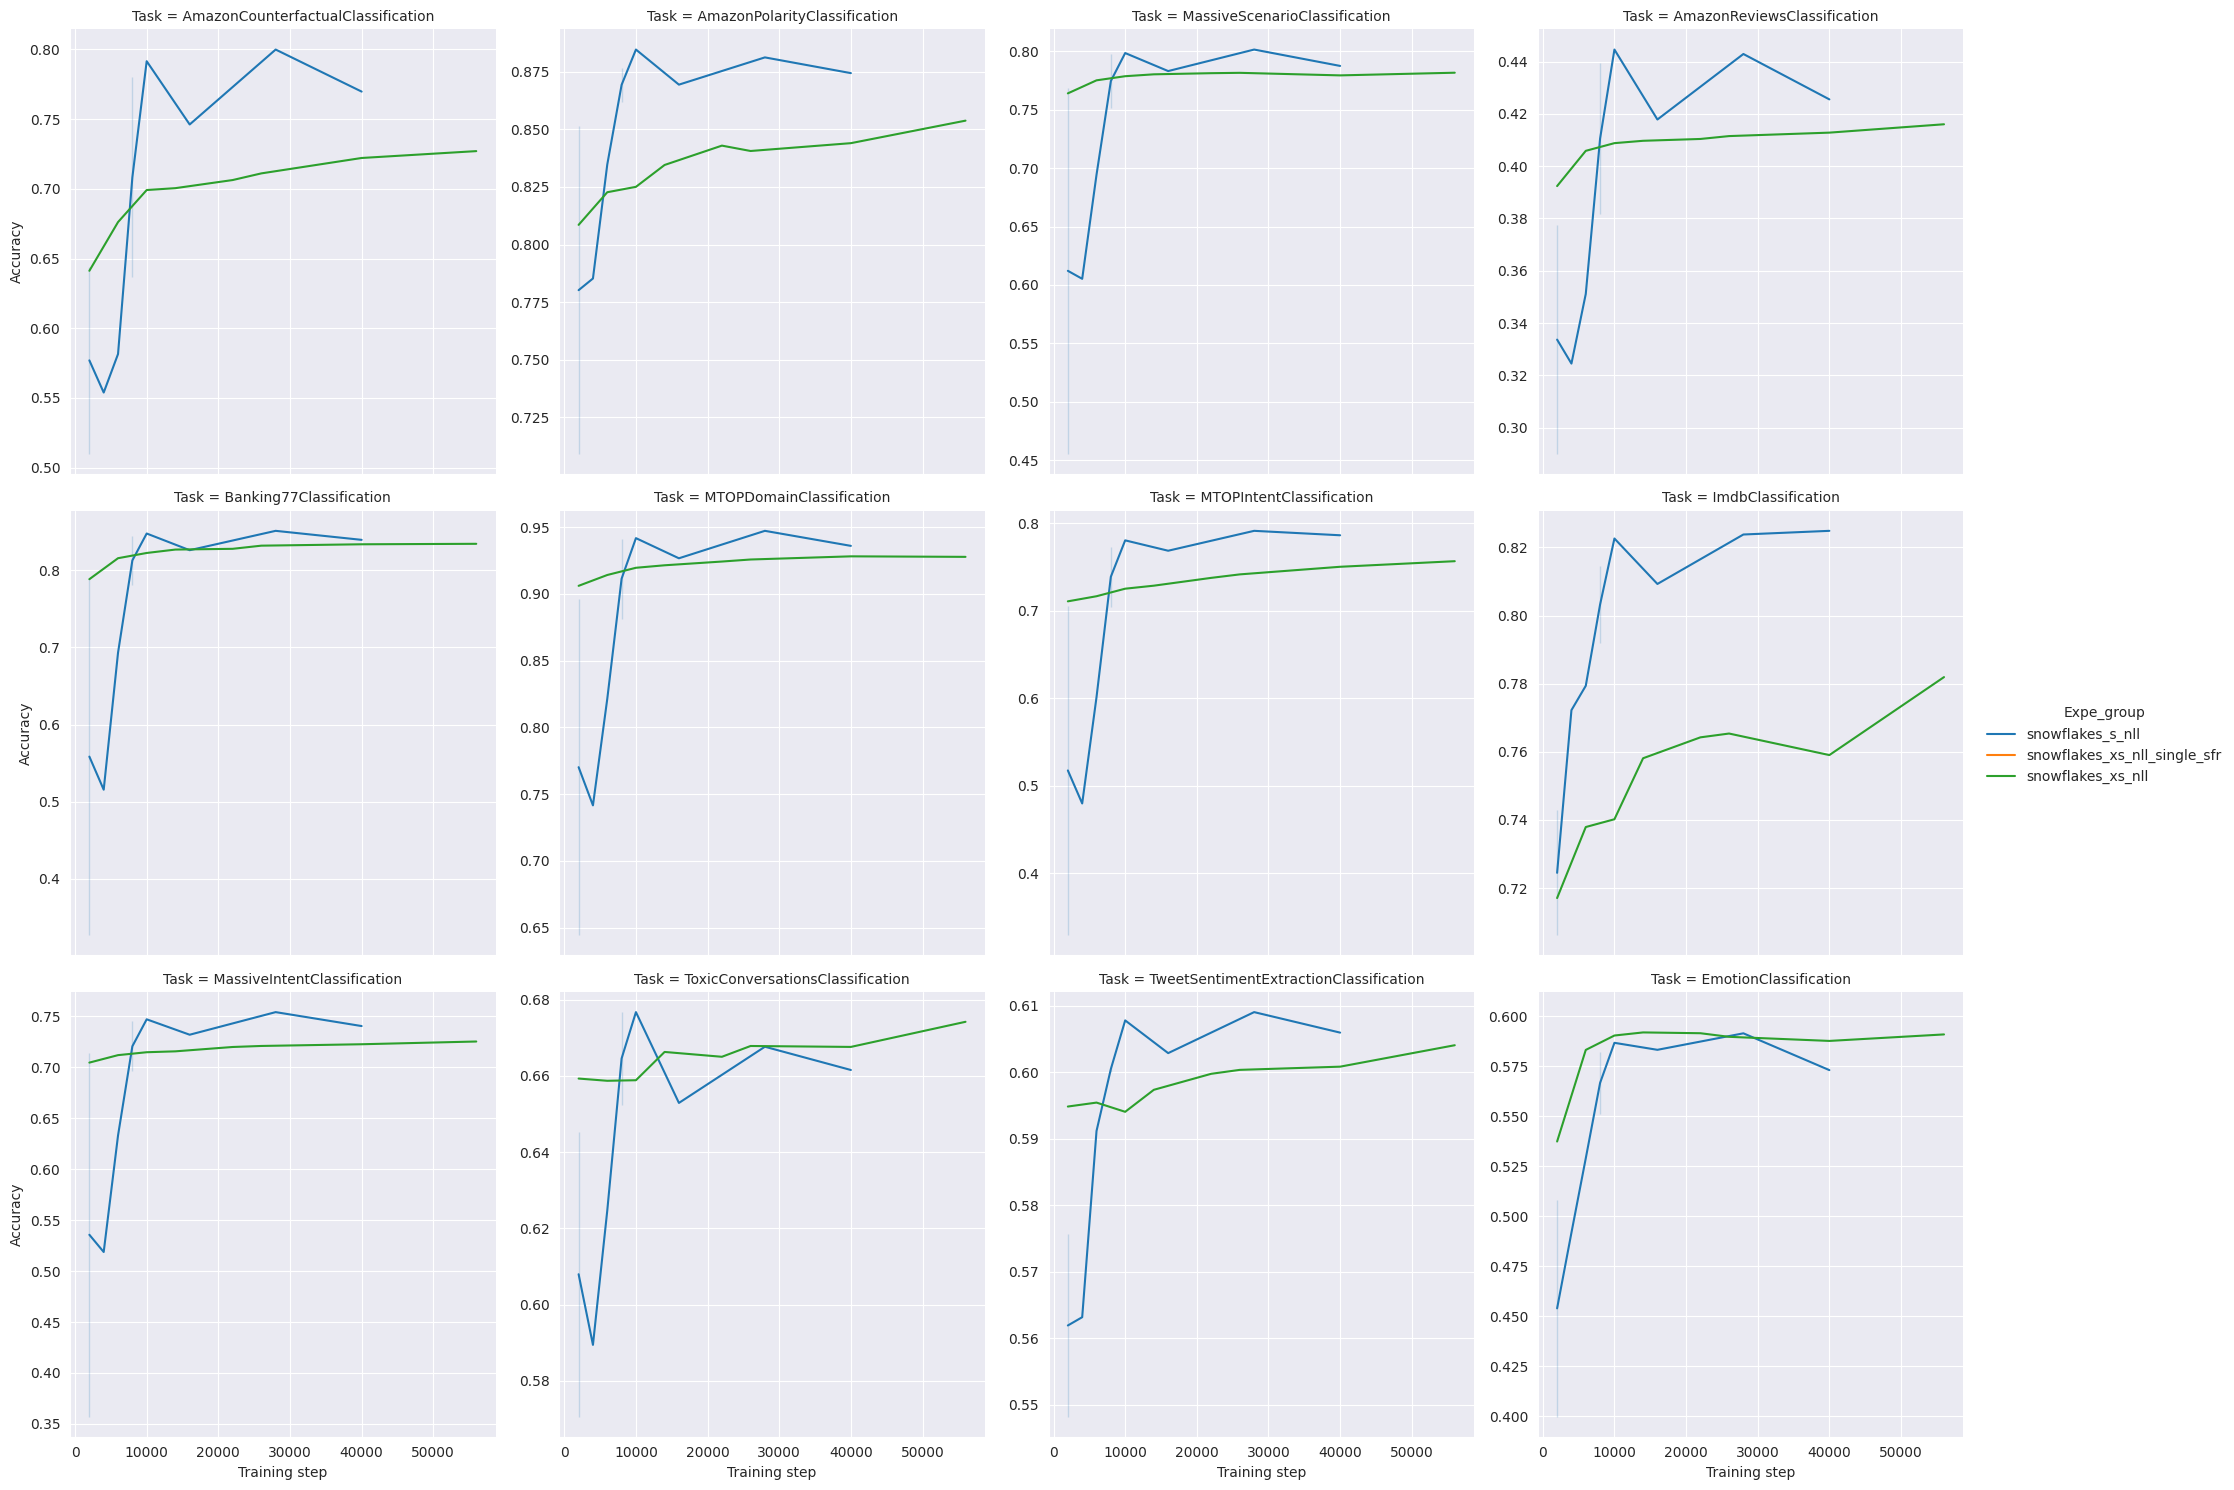

In [49]:


sns.relplot(data=df, x="Training step", y="Accuracy", col="Task", kind="line", aspect=1, col_wrap=4, facet_kws={"sharey": False}, hue="Expe_group")


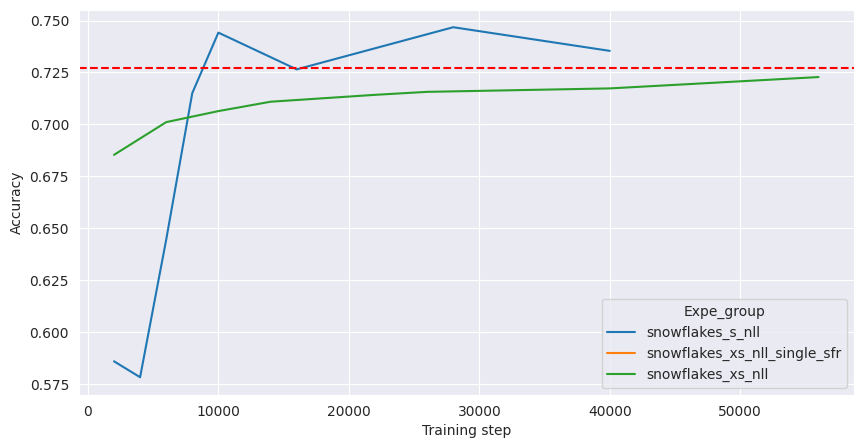

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df, x="Training step", y="Accuracy", errorbar=None, ax=ax, hue="Expe_group")
# add hline at 0.775
ax.axhline(0.7272, color="red", linestyle="--")


In [54]:
df[df['Expe_group'].str.contains('single')]['Accuracy'].mean()

0.7119924934173661